In [1]:
from AVLTree import *
from B_2_3Tree import *
from shapely.geometry import LineString

class Point():
    
    def __init__(self, x, y, number = None, ptype = None, line = None):
        self.x = x
        self.y = y
        self.number = number
        self.ptype = ptype # 0 - start, 1 - end
        self.line = line

    def __lt__(self, point):
        if self.x < point.x:
            return True
        elif self.x == point.x:
            if self.y < point.y:
                return True
            elif self.y == point.y:
                if self.ptype < point.ptype:
                    return True
                else:
                    return False
            else:
                return False
        else:
            return False
    
    def __str__(self):
        return f'({self.x}, {self.y}), {self.number}, {self.ptype}'

class Line():

    def __init__(self, x1, y1, x2, y2, number):

        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        self.number = number

    def __str__(self):

        return f'({self.x1}, {self.y1}, {self.x2}, {self.y2})'

    def __lt__(self, line):
        
        if self.y1 < line.y1:
            return True
        elif self.y1 == line.y1:
            if self.number < line.number:
                return True
            else:
                return False    
        else:
            return False

    def split(self):

        return Point(self.x1, self.y1, self.number, 0, self), Point(self.x2, self.y2, self.number, 1, self)

def sweep_line(E, mode):

    E.sort()
    root = None
    if mode:
        tree = AVLTree()
    else:
        tree = B_2_3Tree()
    for elem in E:
        t = elem.x
        if elem.ptype == 0:
            root = tree.insert(root, elem.line)
            tmp = tree.next(root, tree.find(root, elem.line))
            current_line = elem.line
            line1 = LineString([(current_line.x1, current_line.y1), (current_line.x2, current_line.y2)])
            if tmp:
                line2 = LineString([(tmp.value.x1, tmp.value.y1), (tmp.value.x2, tmp.value.y2)])
                if line1.intersects(line2):
                    return f'{current_line.number}, {tmp.value.number}'   

            tmp = tree.previous(tree.find(root, elem.line), root)

            if tmp:
                line2 = LineString([(tmp.value.x1, tmp.value.y1), (tmp.value.x2, tmp.value.y2)])
                if line1.intersects(line2):
                    return f'{current_line.number}, {tmp.value.number}'   
        else:
            tmp1 = tree.next(root, tree.find(root, elem.line))
            tmp2 = tree.previous(tree.find(root, elem.line), root)
            if tmp1 and tmp2:
                line1 = LineString([(tmp1.value.x1, tmp1.value.y1), (tmp1.value.x2, tmp1.value.y2)])
                line2 = LineString([(tmp2.value.x1, tmp2.value.y1), (tmp2.value.x2, tmp2.value.y2)])
                if line1.intersects(line2):
                    return f'{tmp1.value.number}, {tmp2.value.number}' 
            root = tree.delete(root, elem.line)

    return 'No'

'2, 3'

[(0.2631486208781163, 0.7417150193540406, 0.28294640825220174, 0.7417150193540406, 1), (0.10102141477109927, 0.5780845794464053, 0.34397474964258307, 0.5780845794464053, 2), (0.4167417095836717, 0.5801503384690101, 0.42428550292703143, 0.5801503384690101, 3), (0.2643910047817072, 0.04249511817644391, 0.4176217555160523, 0.04249511817644391, 4), (0.2973370994345232, 0.5036819008040506, 0.34493419296318467, 0.5036819008040506, 5), (0.5167417095836717, 0.7, 0.6167417095836717, 0.3, 6), (0.5367417095836717, 0.3, 0.6367417095836717, 0.7, 7), (0.7907556057043228, 0.4045495289238018, 0.905338358131465, 0.4045495289238018, 1, 8), (0.7834451113282254, 0.45159314364776115, 0.8909192332774211, 0.45159314364776115, 2, 9), (0.7596549925392817, 0.7102461944272218, 0.7856704917173892, 0.7102461944272218, 3, 10)]


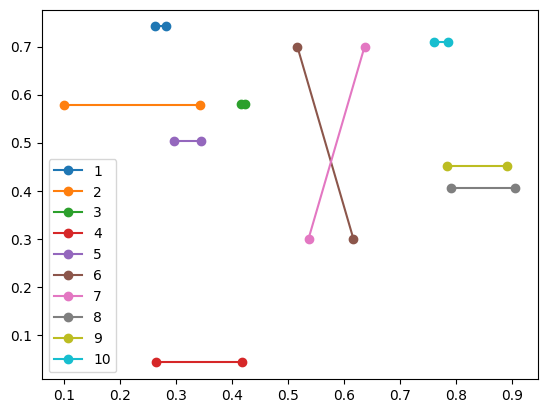

In [38]:
import random
from shapely.geometry import LineString
import matplotlib.pyplot as plt

def square_generate(n, k=None):

    res = []

    max = 0

    for i in range(k):

      x1  = random.uniform(0, 0.5)
      if x1 > max:
        max = x1
      y1  = random.random()

      offset = random.uniform(0.1, 0.5 - x1)
      x2  = random.uniform(x1, x1 + offset)
      res.append((x1, y1, x2, y1, i + 1))

    x2k1 = max + 0.2
    x2k2 = max + 0.22
    res.append((max + 0.1, 0.7, max + 0.2, 0.3, k + 1))
    res.append((max + 0.12, 0.3, max + 0.22, 0.7, k + 2))

    for i in range(n - k - 2):
      x1  = random.uniform(x2k2 + 0.1, 0.8)
      y1  = random.random()

      offset = random.uniform(0.1, 1 - x1)
      x2  = random.uniform(x1, x1 + offset)
      res.append((x1, y1, x2, y1, i + 1, n - k + 3 + i))

    return res

Lines = []
plot_data = []

data = square_generate(10, 5)
print(data)
j = 1

for line in data:
  plt.plot([line[0], line[2]], [line[1], line[3]], marker = 'o', label=j)
  j +=1

plt.legend(loc='best')
plt.show()   


(0.7334309315101671, 0.7926092005463772, 0.7407295741564887, 0.8923424939619728, 1)
(0.5118161279929212, 0.7296358323189447, 0.5938362760554095, 0.7868433083322028, 2)
(0.5451469679451784, 0.850061997064232, 0.5509433996040207, 0.9498938626183944, 3)
(0.8195881215791366, 0.13945416889140833, 0.847541784002734, 0.2354676718850371, 4)
(0.3834994511769078, 0.274618922831622, 0.4349985542020454, 0.3603384794544036, 5)
(0.3420201566143905, 0.24102435436470898, 0.43334134988613277, 0.2817728470905155, 6)
(0.28687430945317616, 0.23088683857074765, 0.32053021518001434, 0.32505307460950084, 7)
(0.3200897123300235, 0.6449019107140787, 0.41408251448283817, 0.679039179841263, 8)
(0.42842399975430023, 0.701809597449429, 0.5234927030731191, 0.7328247816223208, 9)
(0.13597362653008604, 0.7181910322072107, 0.20088129759691337, 0.7942633283253151, 10)
(0.12376797355731323, 0.11661849442645639, 0.15587996497761258, 0.2113223486617652, 11)
(0.4861814106390359, 0.6459057903916096, 0.5356769751606022, 0.73

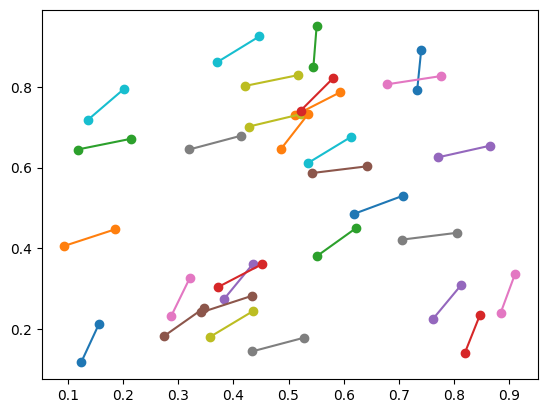

In [83]:
r = 1
angle = 60
import math

def center_segment(n):

    res = []
    r = 0.1

    for i in range(n):

        angle = random.uniform(0.1, math.pi / 2)

        centerX = random.uniform(0.1, 0.9)
        centerY = random.uniform(0.1, 0.9)

        x1 = centerX - r/2 * math.cos(angle)
        y1 = centerY - r/2 * math.sin(angle)

        x2 = centerX + r/2 * math.cos(angle)
        y2 = centerY + r/2 * math.sin(angle)
        
        res.append((x1, y1, x2, y2, i + 1))

    return res

data = center_segment(30)


for line in data:
    print(line)
    plt.plot([line[0], line[2]], [line[1], line[3]], marker = 'o', label=j)
